In [13]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.models import Model
from keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from keras.utils import load_img, img_to_array

warnings.filterwarnings('ignore')

In [14]:
base_dir = 'images'
test_dir = 'test_images'

traingen = Imgen(rescale=1. / 255,
                 shear_range=0.2,
                 zoom_range=0.2,
                 width_shift_range=0.2,
                 height_shift_range=0.2,
                 fill_mode="nearest",
                 validation_split=0.15)

testgen = Imgen(rescale=1. / 255)

# Create datasets
trainds = traingen.flow_from_directory(base_dir,
                                       target_size=(64, 64),
                                       seed=123,
                                       batch_size=64,
                                       subset="training"
                                       )
valds = traingen.flow_from_directory(test_dir,
                                     target_size=(64, 64),
                                     seed=123,
                                     batch_size=64,
                                     subset="validation"
                                     )

image_input = Input(shape=(64, 64, 3))

Found 39959 images belonging to 2 classes.
Found 1747 images belonging to 2 classes.


In [15]:
x = Flatten()(image_input)

x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

image_output = Dense(2, activation="softmax")(x)

ann_model = Model(image_input, image_output)

ann_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 12288)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               3145984   
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                           

In [16]:
ann_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Epoch 1/10
625/625 [==============================] - 336s 538ms/step - loss: 0.6086 - accuracy: 0.6908 - val_loss: 0.7416 - val_accuracy: 0.5598
Epoch 2/10
625/625 [==============================] - 163s 260ms/step - loss: 0.5710 - accuracy: 0.7172 - val_loss: 0.5319 - val_accuracy: 0.7413
Epoch 3/10
625/625 [==============================] - 159s 254ms/step - loss: 0.5747 - accuracy: 0.7172 - val_loss: 0.6319 - val_accuracy: 0.6205
Epoch 4/10
625/625 [==============================] - 157s 251ms/step - loss: 0.5733 - accuracy: 0.7138 - val_loss: 0.5905 - val_accuracy: 0.6772
Epoch 5/10
625/625 [==============================] - 67s 108ms/step - loss: 0.5739 - accuracy: 0.7098 - val_loss: 0.7927 - val_accuracy: 0.5558
Epoch 6/10
625/625 [==============================] - 47s 76ms/step - loss: 0.5860 - accuracy: 0.6923 - val_loss: 0.5926 - val_accuracy: 0.6789
Epoch 7/10
625/625 [==============================] - 47s 76ms/step - loss: 0.5677 - accuracy: 0.7184 - val_loss: 0.5165 - val_

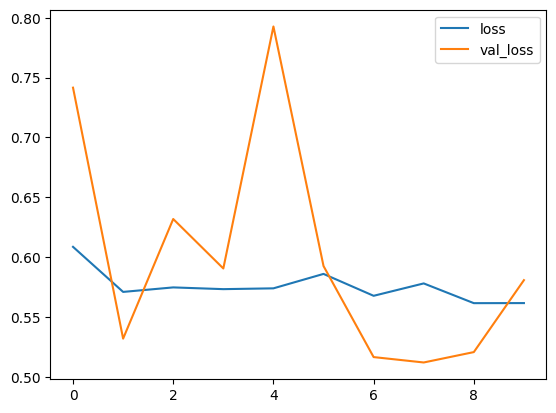

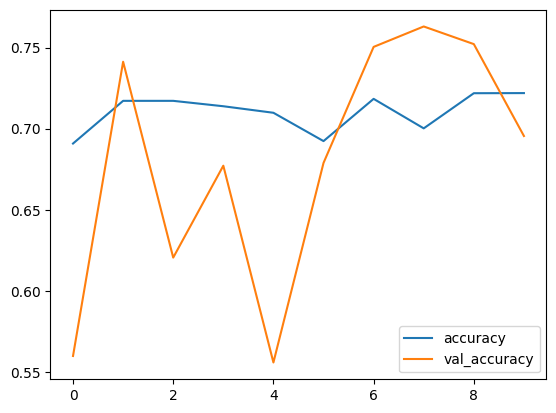

In [17]:
history = ann_model.fit(trainds,
                        epochs=10,
                        validation_data=valds)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 32ms/step
female


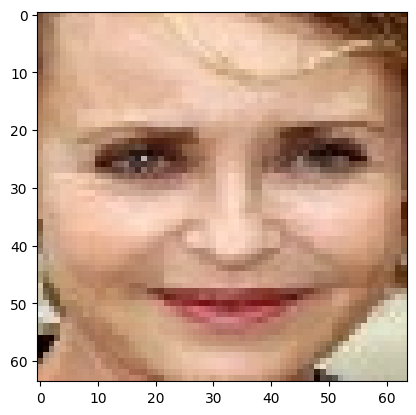

In [25]:
# CLASSIFICATION
test_image = load_img('images/female/131428.jpg.jpg', target_size=(64, 64))

# For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = ann_model.predict(test_image)
# print(result)
print('female') if result[0][0] == 1.0 else print('male')

In [30]:
results = ann_model.evaluate(valds)

28/28 [==============================] - 5s 168ms/step - loss: 0.5760 - accuracy: 0.6846


In [31]:
tests = traingen.flow_from_directory(test_dir,
                                     target_size=(64, 64),
                                     seed=123,
                                     batch_size=64,
                                     subset="validation"
                                     )
test_result = ann_model.evaluate(tests)

Found 1747 images belonging to 2 classes.
28/28 [==============================] - 5s 160ms/step - loss: 0.5765 - accuracy: 0.6961


In [34]:
test_2 = testgen.flow_from_directory(test_dir,
                                     target_size=(64, 64),
                                     seed=123,
                                     batch_size=64,
                                     )
test_2_result = ann_model.evaluate(test_2)

Found 11649 images belonging to 2 classes.
183/183 [==============================] - 65s 356ms/step - loss: 0.5518 - accuracy: 0.7074
